In [ ]:
#! source activate recommend

In [125]:
import pandas as pd
import numpy as np

In [126]:
destinations=pd.read_csv('./Downloads/expedia-hotel-recommendations/destinations.csv')
train=pd.read_csv('./Downloads/expedia-hotel-recommendations/train.csv')
test=pd.read_csv('./Downloads/expedia-hotel-recommendations/test.csv')

In [4]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [8]:
train.apply(lambda x:x.nunique())

date_time                    25419546
site_name                          45
posa_continent                      5
user_location_country             237
user_location_region             1008
user_location_city              50447
orig_destination_distance     8495289
user_id                       1198786
is_mobile                           2
is_package                          2
channel                            11
srch_ci                          1269
srch_co                          1262
srch_adults_cnt                    10
srch_children_cnt                  10
srch_rm_cnt                         9
srch_destination_id             59455
srch_destination_type_id           10
is_booking                          2
cnt                               104
hotel_continent                     7
hotel_country                     213
hotel_market                     2118
hotel_cluster                     100
dtype: int64

<AxesSubplot:>

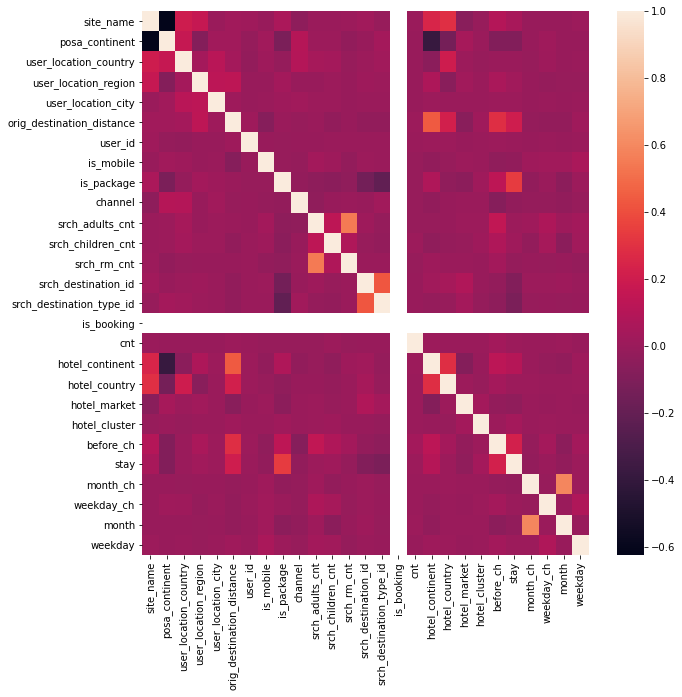

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.corr())

In [127]:
train['date_time']=pd.to_datetime(train['date_time'])
test['date_time']=pd.to_datetime(test['date_time'])


In [128]:
train['srch_ci']=pd.to_datetime(train['srch_ci'],errors='coerce')
test['srch_ci']=pd.to_datetime(test['srch_ci'],errors='coerce')
train['srch_co']=pd.to_datetime(train['srch_co'],errors='coerce')
test['srch_co']=pd.to_datetime(test['srch_co'],errors='coerce')
train['before_ch']=(train['srch_ci']-train['date_time']).dt.days
train['stay']=(train['srch_co']-train['srch_ci']).dt.days
test['before_ch']=(test['srch_ci']-test['date_time']).dt.days
test['stay']=(test['srch_co']-test['srch_ci']).dt.days
train['month_ch']=train['srch_ci'].dt.month
#train['day_ch']=train['srch_ci'].dt.day
train['weekday_ch']=train['srch_ci'].dt.weekday
test['month_ch']=test['srch_ci'].dt.month
#test['day_ch']=test['srch_ci'].dt.day
test['weekday_ch']=test['srch_ci'].dt.weekday

In [6]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market,before_ch,stay,month_ch,weekday_ch
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,1,12243,6,6,204,27,258.0,4.0,5.0,3.0
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,1,14474,7,6,204,1540,230.0,3.0,5.0,3.0
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,1,11353,1,2,50,699,48.0,1.0,7.0,6.0
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,1,8250,1,2,50,628,-1.0,2.0,9.0,0.0
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,1,11812,1,2,50,538,4.0,1.0,7.0,2.0


In [129]:
#train['year']=train['date_time'].dt.year
train['month']=train['date_time'].dt.month
train['weekday']=train['date_time'].dt.weekday
test['month']=test['date_time'].dt.month
test['weekday']=test['date_time'].dt.weekday

In [6]:
# train=train[train['is_booking']==1]

In [130]:
#train=train.sort_values(['date_time'])

In [131]:
train.shape,test.shape

((37670293, 30), (2528243, 28))

In [132]:
train['quarter']=train['date_time'].dt.quarter
train['day']=train['date_time'].dt.day
test['quarter']=test['date_time'].dt.quarter
test['day']=test['date_time'].dt.day

In [128]:
#a.shape,b.shape,c.shape,d.shape

In [95]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'before_ch', 'stay', 'month_ch', 'weekday_ch', 'month',
       'weekday'],
      dtype='object')

In [99]:
train[['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance',  'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market','hotel_cluster']].corr()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,1.000000,-0.622647,0.200815,0.163428,0.001760,0.026644,0.029597,-0.009038,NaN,0.004404,0.251485,0.293636,-0.061258,-0.012063
posa_continent,-0.622647,1.000000,0.168969,-0.079464,0.025726,0.026857,-0.005629,0.038719,NaN,-0.005987,-0.387122,-0.138369,0.045680,0.002089
user_location_country,0.200815,0.168969,1.000000,0.042852,0.113983,0.037816,0.005689,0.024697,NaN,-0.002128,-0.058440,0.195702,0.010047,-0.014050
user_location_region,0.163428,-0.079464,0.042852,1.000000,0.129766,0.133761,0.016076,0.009383,NaN,-0.006459,0.072771,-0.060106,0.030071,0.002792
user_location_city,0.001760,0.025726,0.113983,0.129766,1.000000,0.014661,-0.000681,0.000359,NaN,-0.001980,0.010582,0.002164,0.002651,-0.000628
orig_destination_distance,0.026644,0.026857,0.037816,0.133761,0.014661,1.000000,-0.028688,-0.027779,NaN,0.011110,0.437181,0.216675,-0.062817,0.021587
srch_destination_id,0.029597,-0.005629,0.005689,0.016076,-0.000681,-0.028688,1.000000,0.426388,NaN,-0.002098,0.028016,0.043687,0.081689,-0.001726
srch_destination_type_id,-0.009038,0.038719,0.024697,0.009383,0.000359,-0.027779,0.426388,1.000000,NaN,-0.005828,-0.019733,-0.009547,0.041051,-0.020272
is_booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt,0.004404,-0.005987,-0.002128,-0.006459,-0.001980,0.011110,-0.002098,-0.005828,NaN,1.000000,0.006367,0.001189,0.000643,-0.001263


In [ ]:
'posa_continent','user_location_country','hotel_market'


/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


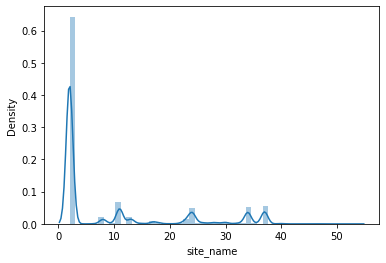

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


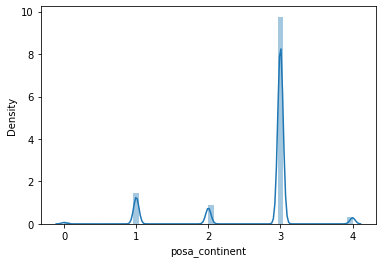

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


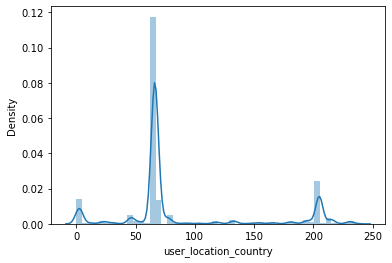

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


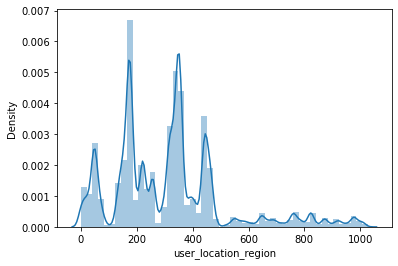

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


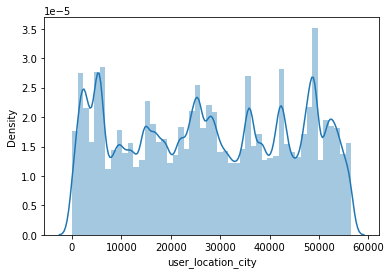

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


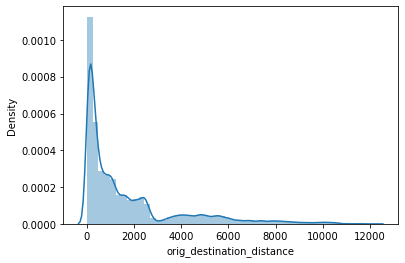

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


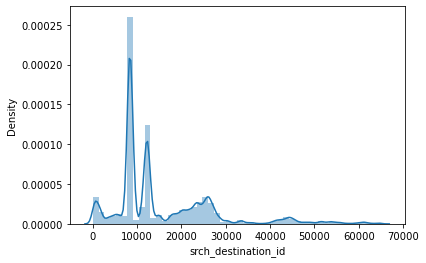

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


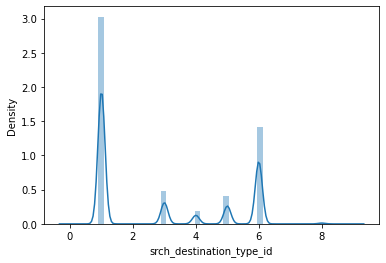

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


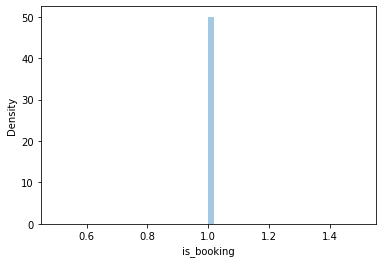

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


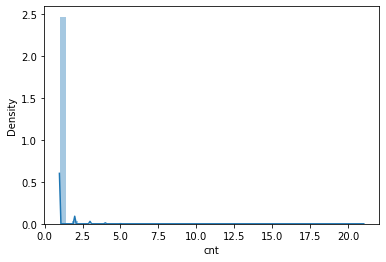

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


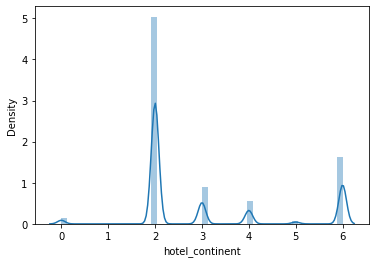

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


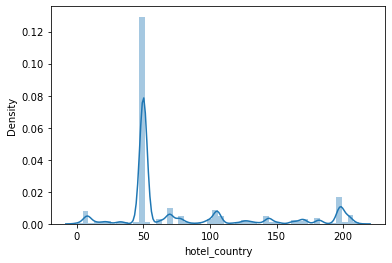

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


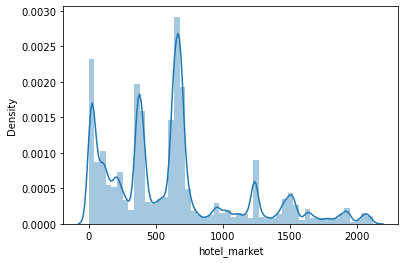

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


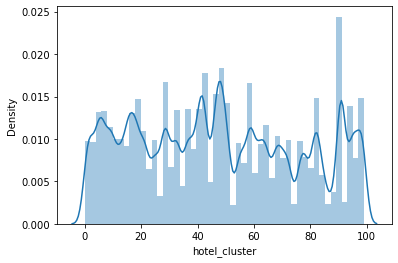

In [101]:
for i in ['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance',  'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market','hotel_cluster']:
    sns.distplot(train[i])
    plt.show()

<AxesSubplot:>

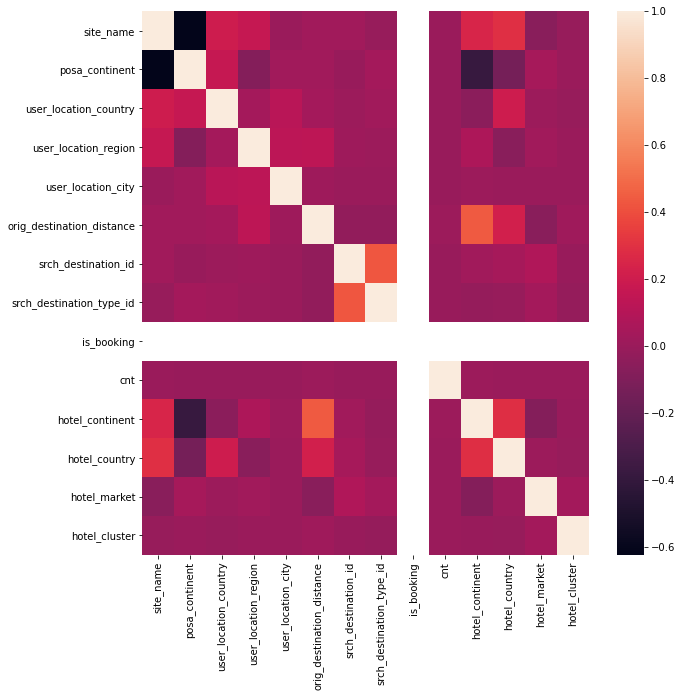

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(train[['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance',  'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market','hotel_cluster']].corr())

In [83]:
#train=train.drop(['site_name', 'user_location_region', 'user_location_city','is_booking','hotel_continent', 'hotel_country'],axis=1)
#test=test.drop(['site_name', 'user_location_region', 'user_location_city','hotel_continent', 'hotel_country'],axis=1)

In [84]:
train.columns

Index(['date_time', 'posa_continent', 'user_location_country',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'cnt',
       'hotel_market', 'hotel_cluster', 'before_ch', 'stay', 'month_ch',
       'weekday_ch', 'month', 'weekday'],
      dtype='object')

In [133]:
#train_sample.groupby(['user_id','hotel_cluster']).size().sort_values(ascending=False)
users=train['user_id'].unique()[:10000]
df=train[train['user_id'].isin(users)]

In [134]:
df=df.sort_values(['date_time'])

In [69]:
#train=pd.merge(train,destinations,on='srch_destination_id')

In [70]:
#df=train.sample(frac=0.01)

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split
train_sample, test_sample = train_test_split(df, test_size=0.2, shuffle=False)

In [136]:
train_sample['date_time'].min(),train_sample['date_time'].max(),test_sample['date_time'].min(),test_sample['date_time'].max()

(Timestamp('2013-01-07 00:22:31'),
 Timestamp('2014-10-12 12:58:06'),
 Timestamp('2014-10-12 13:03:00'),
 Timestamp('2014-12-31 23:08:08'))

In [15]:
destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [137]:
train_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'before_ch', 'stay', 'month_ch', 'weekday_ch', 'month',
       'weekday', 'quarter', 'day'],
      dtype='object')

In [141]:
1*',a'+1*',b'+0.1*',a'

In [154]:
m=train_sample[:10].groupby(['hotel_cluster','is_booking']).size().unstack(1)
m.loc[17]

is_booking
0    1.0
1    NaN
Name: 17, dtype: float64

In [202]:
def fun(data):
    a=data.groupby(['hotel_cluster','is_booking']).size().unstack(1).fillna(0)
    
    eq={}
    for i,row in a.iterrows():
        
        w=0
        if 0 in row.index:
            w+=row[0]
        if 1 in row.index:
            w+=10*row[1]
        
        eq[str(i)]=str(w)
    return eq
    
        
        

In [205]:
u_d_map=train_sample.groupby(['user_id','srch_destination_id']).apply(fun)
d_map=train_sample.groupby(['srch_destination_id']).apply(fun)
u_map=train_sample.groupby(['user_id']).apply(fun)

In [207]:
train_sample=train_sample[train_sample['is_booking']==1]
test_sample=test_sample[test_sample['is_booking']==1]

In [208]:
%%time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
train_sample_imp=imp.fit_transform(train_sample.drop(['hotel_cluster',
    'date_time',  'srch_ci', 'srch_co'],axis=1))
#from autoimpute.imputations import MultipleImputer
test_sample_imp=imp.transform(test_sample.drop(['hotel_cluster',
    'date_time',  'srch_ci', 'srch_co'],axis=1))

CPU times: user 6.01 s, sys: 143 ms, total: 6.15 s
Wall time: 1.14 s


In [73]:
train_sample.drop(['hotel_cluster',
    'date_time',  'srch_ci', 'srch_co'],axis=1).columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'quarter', 'day'],
      dtype='object')

In [74]:
train_sample_imp=pd.DataFrame(train_sample_imp,columns=['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'quarter', 'day'])

test_sample_imp=pd.DataFrame(test_sample_imp,columns=['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'quarter', 'day'])


In [23]:
(train['hotel_cluster'].value_counts()/len(train))[:10]

91    0.040315
48    0.028452
42    0.024369
59    0.022198
28    0.021321
16    0.018888
18    0.018549
95    0.018371
50    0.018132
82    0.018102
Name: hotel_cluster, dtype: float64

In [17]:
train_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'before_ch', 'stay', 'month_ch', 'weekday_ch', 'month',
       'weekday'],
      dtype='object')

In [18]:
import xgboost
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#xgb_cv = XGBClassifier(n_estimators=100, n_jobs=10)
#rf=RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=10)
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    #iterations=100, 
    learning_rate=0.1, 
    silent=True,
    cat_features=['site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
      'hotel_market', 'user_id', 'hotel_continent', 'hotel_country']
    
)



In [19]:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    thread_count=None,
    random_seed=None,
    verbose=None,
    silent=None,
    classes_count=None,
    class_weights=None,
    one_hot_max_size=None,
    max_depth=None,
    n_estimators=None,
    colsample_bylevel=None,
    reg_lambda=None,
    objective=None,
    early_stopping_rounds=None,
    cat_features=None,
    min_data_in_leaf=None,
    min_child_samples=None,
    subsample
 
    
)

SyntaxError: positional argument follows keyword argument (4144412428.py, line 28)

In [20]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_estimators': [100]}]
                    


grd = GridSearchCV(clf, tuned_parameters, scoring='accuracy',cv=3)
#grd.fit(X_train, y_train)
grd.fit(train_sample.drop(['date_time','srch_ci','srch_co','hotel_cluster'],axis=1), train_sample['hotel_cluster'])

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fe3c0c44810>,
             param_grid=[{'n_estimators': [100]}], scoring='accuracy')

In [21]:
grd.cv_results_

{'mean_fit_time': array([3470.376707]),
 'std_fit_time': array([191.2464187]),
 'mean_score_time': array([0.39434338]),
 'std_score_time': array([0.05388292]),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100}],
 'split0_test_score': array([0.14075825]),
 'split1_test_score': array([0.14644337]),
 'split2_test_score': array([0.13771491]),
 'mean_test_score': array([0.14163884]),
 'std_test_score': array([0.00361737]),
 'rank_test_score': array([1], dtype=int32)}

In [27]:
test_sample['hotel_cluster'].unique()

array([16,  2, 25, 94, 72, 26,  4,  5, 11, 91, 23, 99, 68, 18, 19, 40, 48,
       50, 73, 15, 97, 53, 90, 69, 64, 75, 85, 28, 21, 13, 29, 63, 54, 88,
       33, 76, 95, 70, 46,  6, 77, 12, 32, 10,  1, 47,  9, 37, 67, 59, 17,
        8, 30, 82,  7, 35, 36, 58, 57, 98, 83, 61, 62, 31, 56, 14, 51, 42,
       44,  0, 24, 39, 22, 96, 38, 55, 43, 49, 34, 81, 41,  3, 89, 93, 66,
       78, 86, 20, 45, 60, 65, 79, 84, 80, 71, 87, 92, 74, 27, 52])

In [39]:
pro=pd.DataFrame(grd.predict_proba(test_sample.drop(['date_time','srch_ci','srch_co','hotel_cluster'],axis=1)))


In [44]:
#pro
predictions=pro.apply(lambda s, n: list(s.nlargest(n).index), axis=1, n=5)

In [ ]:
# a=train_sample.sample(frac=0.5,random_state=1).groupby(['user_id','srch_destination_id','hotel_market','hotel_cluster']).size().unstack().fillna(0)
# b=train_sample.sample(frac=0.5,random_state=100).groupby(['user_id','srch_destination_id','hotel_market','hotel_cluster']).size().unstack().fillna(0)
# c=train_sample.sample(frac=0.5,random_state=44).groupby(['user_id','srch_destination_id','hotel_market','hotel_cluster']).size().unstack().fillna(0)
# d=train_sample.sample(frac=0.5,random_state=18).groupby(['user_id','srch_destination_id','hotel_market','hotel_cluster']).size().unstack().fillna(0)


# e=a.add(b,fill_value=0).add(c,fill_value=0).add(d,fill_value=0)

hotel_cluster,user_id,srch_destination_id,hotel_market,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,1000262.0,12618.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000262.0,23300.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000262.0,30337.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000262.0,8803.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000262.0,8819.0,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56122,other,other,799.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56123,other,other,849.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56124,other,other,857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56125,other,other,974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
target=[[i] for i in test_sample['hotel_cluster'].values]

In [58]:
import ml_metrics as metrics
metrics.mapk(target,predictions, k=5)

0.23339041095890412

In [75]:
train_sample=pd.concat([train_sample_imp,train_sample[['hotel_cluster','date_time',  'srch_ci', 'srch_co']].reset_index(drop=True)],axis=1)
test_sample=pd.concat([test_sample_imp,test_sample[['hotel_cluster','date_time',  'srch_ci', 'srch_co']].reset_index(drop=True)],axis=1)

In [77]:
#import tffm
#! pip install tffm
#! pip install tffm

In [31]:
# scores = cross_val_score(clf, train_sample.drop(['date_time','user_id','srch_ci','srch_co','hotel_cluster'],axis=1), train_sample['hotel_cluster'], cv=3, scoring = "accuracy")

# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

In [32]:
# #%spark.pyspark

# import pandas as pd
# from pyspark.sql.types import StructType, StructField, NumericType
# from pyspark.sql import SparkSession
# spark = SparkSession \
#     .builder \
#     .appName('Expedia') \
#     .getOrCreate()



In [15]:
#train_sample = spark.createDataFrame(train_sample)

In [78]:
train_sample.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'quarter', 'day',
       'hotel_cluster', 'date_time', 'srch_ci', 'srch_co'],
      dtype='object')

In [81]:
train_sample[['site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']]=train_sample[[
    'site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']].astype(str)

In [82]:
test_sample[['site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']]=test_sample[[
    'site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']].astype(str)

In [115]:
train_sample.nunique()

site_name                       33
posa_continent                   5
user_location_country          146
user_location_region           602
user_location_city            4652
orig_destination_distance    77829
user_id                       8369
is_mobile                        2
is_package                       2
channel                         11
srch_adults_cnt                 10
srch_children_cnt               10
srch_rm_cnt                      9
srch_destination_id           5211
srch_destination_type_id         8
is_booking                       1
cnt                              8
hotel_continent                  6
hotel_country                  178
hotel_market                  1636
before_ch                      396
stay                            28
month_ch                        12
weekday_ch                       7
month                           12
weekday                          7
quarter                          4
day                             31
hotel_cluster       

In [118]:
for i in ['posa_continent',  'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']:
    grp=train_sample.groupby([i]).size().rename('count').reset_index()
    l=grp[grp['count']>2][i]
    train_sample[i]=np.where(train_sample[i].isin(l),train_sample[i],'other')
    test_sample[i]=np.where(test_sample[i].isin(l),test_sample[i],'other')

In [119]:
train_sample_cat=pd.get_dummies(train_sample[['posa_continent',  'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']])
test_sample_cat=pd.get_dummies(test_sample[['posa_continent',  'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market']])

In [30]:
train_sample.columns

Index(['posa_continent', 'user_location_country', 'orig_destination_distance',
       'user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
       'srch_destination_type_id', 'cnt', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'hotel_cluster',
       'date_time', 'srch_ci', 'srch_co'],
      dtype='object')

In [31]:
# train = (spark.read
#           .format("csv")
#           .option('header', 'true')
#           .load('./Downloads/expedia-hotel-recommendations/train.csv'))

# test = (spark.read
#           .format("csv")
#           .option('header', 'true')
#           .load('./Downloads/expedia-hotel-recommendations/test.csv'))

# destinations = (spark.read
#           .format("csv")
#           .option('header', 'true')
#           .load('./Downloads/expedia-hotel-recommendations/destinations.csv'))


# # destinations=pd.read_csv('./Downloads/expedia-hotel-recommendations/destinations.csv')
# # train=pd.read_csv('./Downloads/expedia-hotel-recommendations/train.csv')
# # test=pd.read_csv('./Downloads/expedia-hotel-recommendations/test.csv')

In [241]:
#train.show(10)
destinations.columns

Index(['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9',
       ...
       'd140', 'd141', 'd142', 'd143', 'd144', 'd145', 'd146', 'd147', 'd148',
       'd149'],
      dtype='object', length=150)

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

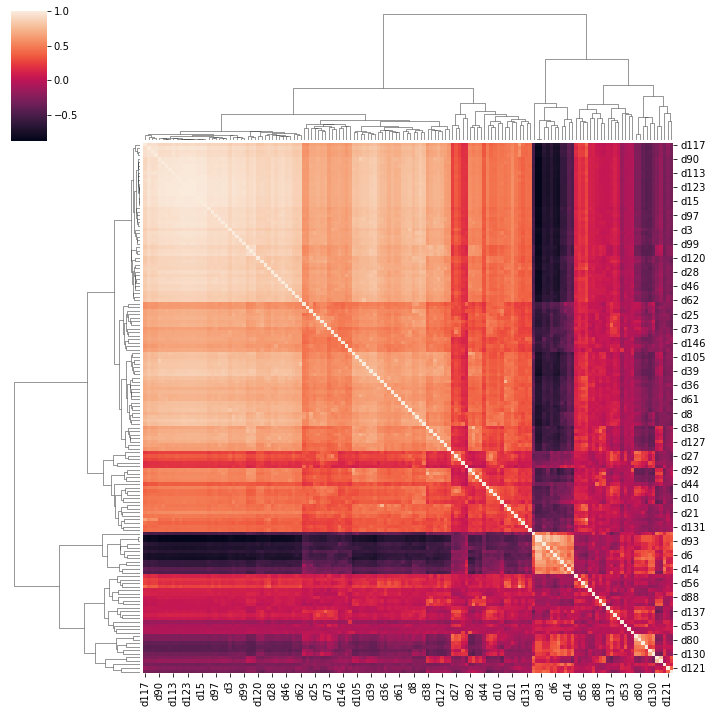

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.clustermap(destinations.corr())

In [96]:
destinations.columns

Index(['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9',
       ...
       'd140', 'd141', 'd142', 'd143', 'd144', 'd145', 'd146', 'd147', 'd148',
       'd149'],
      dtype='object', length=150)

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import scipy

scaler = MinMaxScaler()
dest=scaler.fit_transform(destinations.iloc[:,1:])


pca = PCA(n_components=20)
pca.fit(dest)

print(pca.explained_variance_ratio_)

[0.54139786 0.07351881 0.04061735 0.02225059 0.02009661 0.017261
 0.01428224 0.01332005 0.01054921 0.00936204 0.00863352 0.0080338
 0.00748644 0.0072001  0.00660368 0.00621064 0.00586722 0.00564289
 0.00525084 0.00510336]


In [99]:
pca = PCA(n_components=3)
pca.fit(dest)
dest=pca.transform(dest)
print(pca.explained_variance_ratio_)

[0.54139786 0.07351881 0.04061735]


In [104]:
dest=pd.concat([destinations['srch_destination_id'],pd.DataFrame(dest,columns=['pca_1','pca_2','pca_3'])],axis=1)

In [108]:
dest['srch_destination_id']=dest['srch_destination_id'].map(str)

In [109]:
train_sample=pd.merge(train_sample,dest,on='srch_destination_id',how='left')
test_sample=pd.merge(test_sample,dest,on='srch_destination_id',how='left')

In [34]:
# train_sample=pd.merge(train_sample,e,on='user_id',how='left')
# test_sample=pd.merge(test_sample,e,on='user_id',how='left')

In [110]:
train_sample.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'before_ch', 'stay',
       'month_ch', 'weekday_ch', 'month', 'weekday', 'quarter', 'day',
       'hotel_cluster', 'date_time', 'srch_ci', 'srch_co', 'pca_1', 'pca_2',
       'pca_3'],
      dtype='object')

In [120]:
train_sample_cat=pd.concat([train_sample,train_sample_cat.reset_index(drop=True)],axis=1)
test_sample_cat=pd.concat([test_sample,test_sample_cat.reset_index(drop=True)],axis=1)

In [ ]:
# import tensorflow as tf
# #from tffm import TFFMClassifier
# from tffm import TFFMRegressor

# #!pip install pandas==0.19.2
# #!conda install tensorflow==0.12.1
#!pip install numpy==1.12.0
#!pip install scikit-learn==0.18.1
#!pip install tqdm==4.11.2
#!pip install scipy==0.17.0

In [ ]:
model = TFFMRegressor(
    order=3,
    rank=10,
    optimizer=tf.train.AdamOptimizer(learning_rate=0.1),
    n_epochs=100,
    batch_size=-1,
    init_std=0.001,
    input_type='dense'
)



In [121]:
test_sample_cat.shape,train_sample_cat.shape

((21900, 10817), (87596, 15941))

In [37]:
#test_sample=test_sample.reindex(columns=train_sample.columns,fill_value=0,)

In [114]:
test_sample_cat.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel',
       ...
       'hotel_market_984.0', 'hotel_market_986.0', 'hotel_market_988.0',
       'hotel_market_99.0', 'hotel_market_990.0', 'hotel_market_993.0',
       'hotel_market_994.0', 'hotel_market_996.0', 'hotel_market_998.0',
       'hotel_market_other'],
      dtype='object', length=12582)

In [167]:
# model.fit(train_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), train_sample['hotel_cluster'], show_progress=True)
# predictions = model.predict(test_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1))
# #cold_start_predictions = model.predict(X_te_cs)
# print('MSE: {}'.format(mean_squared_error(test_sample['hotel_cluster'], predictions)))
# #print('Cold-start MSE: {}'.format(mean_squared_error(y_te_cs, predictions)))

In [47]:
#! pip install git+https://github.com/coreylynch/pyFM


In [107]:
import pyfm

In [165]:
# from pyfm import pylibfm

# # from sklearn.datasets import make_classification

# # X, y = make_classification(n_samples=1000,n_features=100, n_clusters_per_class=1)
# # data = [ {v: k for k, v in dict(zip(i, range(len(i)))).items()}  for i in X]

# # X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=42)

# # v = DictVectorizer()
# # X_train = v.fit_transform(X_train)
# # X_test = v.transform(X_test)

# fm = pylibfm.FM(num_factors=50, num_iter=10, verbose=True, task="classification", initial_learning_rate=0.1, learning_rate_schedule="optimal")

# model.fit(train_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), train_sample['hotel_cluster'], show_progress=True)
# predictions = model.predict(test_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1))





In [166]:

# from sklearn.metrics import log_loss
# print ("Validation log loss: %.4f" % log_loss(test_sample['hotel_cluster'],predictions))
# Validation log loss: 1.5025

In [164]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
# from sklearn import metrics
# import tensorflow as tf

# # Parameters
# learning_rate = 0.01
# num_steps = 8000
# batch_size = 256
# display_step = 100

# # FM Parameters
# number_latent = 5
# num_input = train_sample.shape[1] # MNIST data input (img shape: 28*28)
# num_classes = 100 # MNIST total classes (0-9 digits)

# # Regularization terms for W and V matrices
# lambda_w = tf.constant(0.0015, name='lambda_w')
# lambda_v = tf.constant(0.0015, name='lambda_v')

# # tf Graph input
# X = tf.placeholder("float", [None, num_input])
# Y = tf.placeholder("float", [None, num_classes])

# # Store layers weight & bias
# weights = {
#     'W': tf.Variable(tf.random_normal([num_input, num_classes])),
#     'b': tf.Variable(tf.random_normal([num_classes]))
# }
# interactions = {
#     'V': tf.Variable(tf.random_normal([num_input, number_latent, num_classes])),
# }

# # Create model
# def fm(x):
#     # Linear terms 
#     linear_terms = tf.add(tf.matmul(x, weights['W']), weights['b'])
#     # Simplification follows: Rendle, 2010 and Rendle, 2012.

#     # Squered sum of product (using tensordot as we are having tensors 
#     # instead of matrices for multiclass classification)
#     s1 = tf.pow(
#         tf.reduce_sum(
#             tf.tensordot(
#                 x, 
#                 interactions['V'], [[1], [0]]
#             ), 1
#         ), 2)

#     # Sum of squared product 
#     s2 = tf.reduce_sum(
#         tf.tensordot(
#             tf.pow(x, 2), 
#             tf.pow(interactions['V'], 2), 
#             [[1], [0]]
#         ), 1)
#     outputs = linear_terms + 1/2*(s1-s2)
#     return outputs

# # Construct model
# logits = fm(X)
# prediction = tf.nn.softmax(logits)

# # Define loss, regularisation, and optimizer
# error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=logits, labels=Y))


# regularisation = tf.add(tf.reduce_sum(lambda_v * tf.math.abs(interactions['V'])),
#                         tf.reduce_sum(lambda_w * tf.pow(weights['W'],2)))
# loss_op = error + regularisation
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# train_op = optimizer.minimize(loss_op)

# # Evaluate model
# correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# cm = tf.math.confusion_matrix(tf.argmax(Y, 1), tf.argmax(prediction, 1))

# # Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()

# # Start training
# with tf.Session() as sess:

#     # Run the initializer
#     sess.run(init)

#     for step in range(1, num_steps+1):
#         if step%1000 == 0:
#             learning_rate = learning_rate/2
#         batch = train_sample.next_batch(batch_size)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), Y: batch['hotel_cluster']})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([error, accuracy], feed_dict={X: batch.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), Y: batch['hotel_cluster']})

#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))

#     print("Optimization Finished!")

#     # Calculate accuracy for MNIST test images
#     print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: test_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), Y: test_sample['hotel_cluster']}))
#     print("Testing Confusion Matrix: \n", sess.run(cm, feed_dict={X: test_sample.drop(['posa_continent', 'user_location_country',
#     'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
#     'date_time',  'srch_ci', 'srch_co'],axis=1), Y: test_sample['hotel_cluster']}))

In [112]:
import numpy as np
#from numba import njit
from tqdm import trange
from sklearn.base import BaseEstimator, ClassifierMixin


class FactorizationMachineClassifier(BaseEstimator, ClassifierMixin):
    """
    Factorization Machine [1]_ using Stochastic Gradient Descent.
    For binary classification only.

    Parameters
    ----------
    n_iter : int, default 10
        Number of iterations to train the algorithm.

    n_factors : int, default 10
        Number/dimension of features' latent factors.

    learning_rate : float, default 0.1
        Learning rate for the gradient descent optimizer.

    reg_coef : float, default 0.01
        Regularization strength for weights/coefficients.

    reg_factors : float, default 0.01
        Regularization strength for features' latent factors.

    random_state : int, default 1234
        Seed for the randomly initialized features latent factors

    verbose : bool, default True
        Whether to print progress bar while training.

    Attributes
    ----------
    intercept_ : double
        Intercept term, w0 based on the original notations.

    coef_ : 1d ndarray, shape [n_features,]
        Coefficients, w based on the original notations.

    feature_factors_ : 2d ndarray, shape [n_factors, n_features]
        Latent factors for all features. v based on the original
        notations. The learned factors can be viewed as the
        embeddings for each features. If a pair of features tends
        to co-occur often, then their embeddings should be
        close/similar (in terms of cosine similarity) to each other.

    history_ : list
        Loss function's history at each iteration, useful
        for evaluating whether the algorithm converged or not.

    References
    ----------
    .. [1] `S. Rendle Factorization Machines (2010)
            <http://www.csie.ntu.edu.tw/~b97053/paper/Rendle2010FM.pdf>`_ 
    """

    def __init__(self, n_iter = 10, n_factors = 10,
                 learning_rate = 0.1, reg_coef = 0.01,
                 reg_factors = 0.01, random_state = 1234, verbose = False):
        self.n_iter = n_iter
        self.verbose = verbose
        self.reg_coef = reg_coef
        self.n_factors = n_factors
        self.reg_factors = reg_factors
        self.random_state = random_state
        self.learning_rate = learning_rate

    def fit(self, X, y):
        """
        Fit the model to the input data and label.

        Parameters
        ----------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        y : 1d ndarray, shape [n_samples,]
            Training data's corresponding label.

        Returns
        -------
        self
        """

        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        # the factors are often initialized with a mean of 0 and standard deviation
        # of 1 / sqrt(number of latent factor specified)
        np.random.seed(self.random_state)
        self.feature_factors_ = np.random.normal(
            scale = 1 / np.sqrt(self.n_factors), size = (self.n_factors, n_features))
        
        # the gradient is implemented in a way that requires
        # the negative class to be labeled as -1 instead of 0
        y = y.copy().astype(np.int32)
        y[y == 0] = -1

        loop = range(self.n_iter)
        if self.verbose:
            loop = trange(self.n_iter)

        self.history_ = []
        for _ in loop:
            loss = _sgd_update(X.data, X.indptr, X.indices,
                               y, n_samples, n_features,
                               self.intercept_, self.coef_,
                               self.feature_factors_, self.n_factors,
                               self.learning_rate, self.reg_coef, self.reg_factors)
            self.history_.append(loss)

        return self

    def predict_proba(self, X):
        """
        Probability estimates. The returned estimates for
        all classes are ordered by the label of classes.

        Paramters
        ---------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        Returns
        -------
        proba : 2d ndarray, shape [n_samples, n_classes]
            The probability of the sample for each class in the model.
        """
        pred = self._predict(X)
        pred_proba = 1.0 / (1.0 + np.exp(-pred))
        proba = np.vstack((1 - pred_proba, pred_proba)).T
        return proba

    def _predict(self, X):
        """Similar to _predict_instance but vectorized for all samples"""
        linear_output = X * self.coef_
        v = self.feature_factors_.T
        term = (X * v) ** 2 - (X.power(2) * (v ** 2))
        factor_output = 0.5 * np.sum(term, axis = 1)
        return self.intercept_ + linear_output + factor_output

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters
        ----------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        Returns
        -------
        Predicted class label per sample.
        """
        pred_proba = self.predict_proba(X)[:, 1]
        return pred_proba.round().astype(np.int)



def _sgd_update(data, indptr, indices, y, n_samples, n_features,
                w0, w, v, n_factors, learning_rate, reg_w, reg_v):
    """
    Compute the loss of the current iteration and update
    gradients accordingly.
    """
    loss = 0.0
    for i in range(n_samples):
        pred, summed = _predict_instance(data, indptr, indices, w0, w, v, n_factors, i)
        
        # calculate loss and its gradient
        loss += _log_loss(pred, y[i])
        loss_gradient = -y[i] / (np.exp(y[i] * pred) + 1.0)
    
        # update bias/intercept term
        w0 -= learning_rate * loss_gradient

        # update weight
        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            w[feature] -= learning_rate * (loss_gradient * data[index] + 2 * reg_w * w[feature])

        # update factor
        for factor in range(n_factors):
            for index in range(indptr[i], indptr[i + 1]):
                feature = indices[index]
                term = summed[factor] - v[factor, feature] * data[index]
                v_gradient = loss_gradient * data[index] * term
                v[factor, feature] -= learning_rate * (v_gradient + 2 * reg_v * v[factor, feature])
    
    loss /= n_samples
    return loss



def _predict_instance(data, indptr, indices, w0, w, v, n_factors, i):
    """predicting a single instance"""
    summed = np.zeros(n_factors)
    summed_squared = np.zeros(n_factors)

    # linear output w * x
    pred = w0
    for index in range(indptr[i], indptr[i + 1]):
        feature = indices[index]
        pred += w[feature] * data[index]

    # factor output
    for factor in range(n_factors):
        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            term = v[factor, feature] * data[index]
            summed[factor] += term
            summed_squared[factor] += term * term

        pred += 0.5 * (summed[factor] * summed[factor] - summed_squared[factor])
    
    # summed is the independent term that can be re-used
    # during the gradient update stage
    return pred, summed



def _log_loss(pred, y):
    """
    negative log likelihood of the
    current prediction and label, y.
    """
    return np.log(np.exp(-pred * y) + 1.0)

In [122]:
train_sample_cat.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel',
       ...
       'hotel_market_988.0', 'hotel_market_989.0', 'hotel_market_99.0',
       'hotel_market_990.0', 'hotel_market_991.0', 'hotel_market_993.0',
       'hotel_market_994.0', 'hotel_market_996.0', 'hotel_market_998.0',
       'hotel_market_other'],
      dtype='object', length=15941)

In [66]:
from sklearn.preprocessing import MinMaxScaler
import scipy

train_x=np.array(train_sample_cat.drop(['site_name','posa_continent', 'user_location_country','user_location_region', 'user_location_city',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
    'date_time',  'srch_ci', 'srch_co'],axis=1).fillna(0))


scaler = MinMaxScaler()
train_x=scaler.fit_transform(train_x)
train_x = scipy.sparse.csr.csr_matrix(train_x, shape=(train_x.shape))


In [67]:
fm = FactorizationMachineClassifier(n_iter = 300, learning_rate = 0.01)
fm.fit(train_x, train_sample_cat['hotel_cluster'].values)

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:176: RuntimeWarning: overflow encountered in exp
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: RuntimeWarning: overflow encountered in exp


FactorizationMachineClassifier(learning_rate=0.01, n_iter=300)

In [68]:
fm.history_



[inf,
 inf,
 0.016593441672303946,
 0.0188251787900034,
 0.01703878613583775,
 0.021624481745504655,
 0.013818984403814969,
 0.020617308084627677,
 inf,
 0.020622950427959138,
 0.0168264752842885,
 0.013861385418319171,
 0.01709492694038269,
 0.02267120919859599,
 0.011175337074472092,
 inf,
 inf,
 0.01546053407688958,
 0.013840425225678715,
 inf,
 0.015613219092875904,
 0.018450524881317553,
 0.017890307781718698,
 inf,
 0.011949799795817746,
 inf,
 inf,
 0.011295785443076845,
 0.0144831782268316,
 0.012993841250897848,
 inf,
 0.011639366950963388,
 inf,
 0.010127216195273792,
 0.011672074589388143,
 inf,
 0.010315545995378334,
 0.01703125949987622,
 0.009659848592167609,
 inf,
 inf,
 0.010204891419313706,
 0.015818191191995262,
 0.008420801426245458,
 0.011295135426763941,
 0.016478309748220066,
 0.01098438582838957,
 inf,
 0.007920868004826618,
 inf,
 0.010706552523827434,
 inf,
 inf,
 0.010675964678073822,
 inf,
 0.013488088669165508,
 0.015243133000138704,
 0.017540882853590085,
 

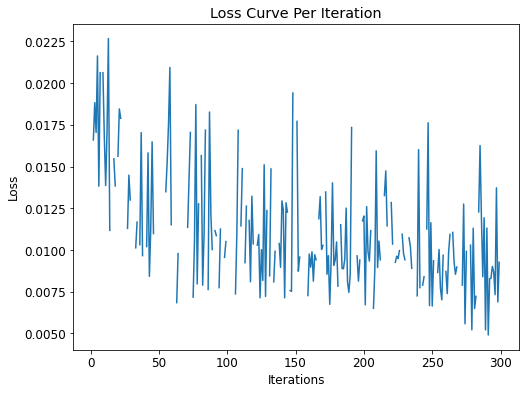

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# one quick way to check that we've implemented
# the gradient descent is to ensure that the loss
# curve is steadily decreasing
plt.plot(fm.history_)
plt.title('Loss Curve Per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [70]:
test_sample_cat=test_sample_cat.reindex(columns=train_sample_cat.columns,fill_value=0)
test_x=np.array(test_sample_cat.drop(['posa_continent', 'user_location_country',
    'user_id', 'channel',  'srch_destination_id', 'srch_destination_type_id',  'hotel_market','hotel_cluster',
    'date_time',  'srch_ci', 'srch_co'],axis=1).fillna(0))


test_x=scaler.transform(test_x)
test_x = scipy.sparse.csr.csr_matrix(test_x, shape=(test_x.shape))


predictions = fm.predict(test_x)




In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_sample_cat['hotel_cluster'].values,predictions)

array([[ 56,  38,   0, ...,   0,   0,   0],
       [  0, 203,   0, ...,   0,   0,   0],
       [  9, 374,   0, ...,   0,   0,   0],
       ...,
       [ 18, 259,   0, ...,   0,   0,   0],
       [ 15, 407,   0, ...,   0,   0,   0],
       [ 13, 283,   0, ...,   0,   0,   0]])

In [72]:
from sklearn.metrics import classification_report
print(classification_report(test_sample_cat['hotel_cluster'].values,predictions))

              precision    recall  f1-score   support

           0       0.04      0.60      0.07        94
           1       0.01      1.00      0.02       203
           2       0.00      0.00      0.00       383
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00       220
           5       0.00      0.00      0.00       362
           6       0.00      0.00      0.00       275
           7       0.00      0.00      0.00       241
           8       0.00      0.00      0.00       118
           9       0.00      0.00      0.00       342
          10       0.00      0.00      0.00       190
          11       0.00      0.00      0.00       265
          12       0.00      0.00      0.00        83
          13       0.00      0.00      0.00       316
          14       0.00      0.00      0.00        94
          15       0.00      0.00      0.00       253
          16       0.00      0.00      0.00       435
          17       0.00    

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
sum(test_sample_cat['hotel_cluster']==predictions)/len(predictions)

0.011826484018264841